# Visualizing the Parts of the Connectome that Predict Rate of Forgetting

In [1]:
import nilearn.plotting as nip
import nilearn.image as nimg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

/home/stocco/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
oldfont = plt.rcParams['font.sans-serif']
plt.rcParams['font.sans-serif'] = ['FreeSans']

## Load the Power 2011 classification

All of the connectomes in this analysis were extacted from the Power 2011 classification. We will start by first loading the corresponding data table.

In [3]:
power2011 = pd.read_csv("../rsfmri/bin/power_2011.csv")
power2011 = power2011.iloc[:,0:7]
power2011

ROI   X   Y   Z  Network  Color       NetworkName
0      1 -25 -98 -12       -1  White         Uncertain
1      2  27 -97 -13       -1  White         Uncertain
2      3  24  32 -18       -1  White         Uncertain
3      4 -56 -45 -24       -1  White         Uncertain
4      5   8  41 -24       -1  White         Uncertain
..   ...  ..  ..  ..      ...    ...               ...
259  260 -27 -71  37       12  Green  Dorsal attention
260  261 -32  -1  54       12  Green  Dorsal attention
261  262 -42 -60  -9       12  Green  Dorsal attention
262  263 -17 -59  64       12  Green  Dorsal attention
263  264  29  -5  54       12  Green  Dorsal attention

[264 rows x 7 columns]

### Visualize the Brain Parcellation

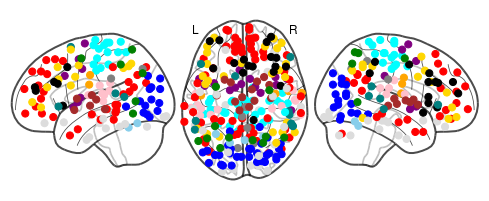

In [4]:
pc = np.zeros((264, 264))
pcol = [x.lower() for x in list(power2011['Color'])]

def colortranslate(x):
    if x.lower() == "yellow":
        return "gold"
    elif x.lower() == "pale blue":
        return "skyblue"
    elif x.lower() == "white":
        return "gainsboro"
    else:
        return x
    
pcol = [colortranslate(x) for x in pcol]
xyz = []
for roi in list(power2011['ROI']):
    entry = power2011.loc[power2011['ROI'] == roi]
    x = int(entry['X'])
    y = int(entry['Y'])
    z = int(entry['Z'])
    xyz.append((x,y,z))
pcoords = np.array(xyz)

img = nip.plot_connectome(pc, pcoords, node_color=pcol, display_mode='lzr')

/tmp/ipykernel_62169/917920154.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("figures/power2011.png", figsize=(8, 4), dpi=300)


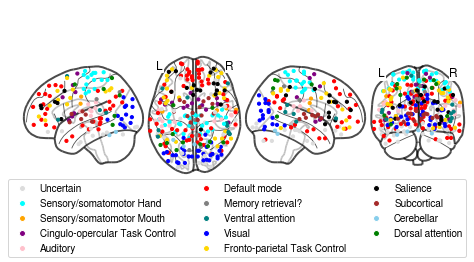

In [5]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
fig, axs = plt.subplots(1,1, figsize=(8,4))
nip.plot_connectome(pc, pcoords, node_color=pcol, display_mode='lzry', axes=axs, node_size=10)

allkols=list(power2011['Color'])
allnets=list(power2011['NetworkName'])

kols=[]
nets=[]
for i in range(len(allkols)):
    if not allkols[i] in kols:
        kols.append(allkols[i])
        nets.append(allnets[i])

handles = [Line2D([0], [0], marker='o', markerfacecolor=x, color="w", markersize=6) for x in [colortranslate(x) for x in kols]]

fig.legend(handles, nets, loc="lower center", ncol=3)
plt.savefig("figures/power2011.png", figsize=(8, 4), dpi=300)
plt.show()

## Visualize the Connectome Matrix

We can visualize the connectome matrix for the 62 participants. First, we load the data:

In [6]:
R = np.zeros((264, 264, 61))
PR = np.zeros((264, 264, 61))

index = 0
for ii in range(1, 63):
    subj = "sub-%03d" % (ii,)
    if ii != 8:
        R[:,:,index]=np.loadtxt("../rsfmri/%s/R_py.txt" % (subj,))
        PR[:,:,index]=np.loadtxt("../rsfmri/%s/PR_py.txt" % (subj,))
        index += 1

Then, we visualize it as a matrix

/tmp/ipykernel_62169/1874652396.py:2: RuntimeWarning: divide by zero encountered in log
  mR = np.tanh(np.mean((np.log(1+R) - np.log(1-R))/2, 2))
/tmp/ipykernel_62169/1874652396.py:3: RuntimeWarning: divide by zero encountered in log
  mPR = np.tanh(np.mean((np.log(1+PR) - np.log(1-PR))/2, 2))


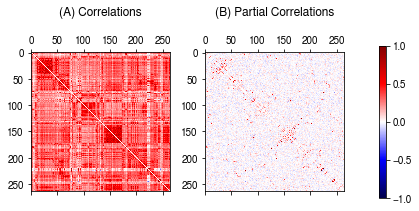

In [7]:
# Calculate mean r values using Fisher's Z transform
mR = np.tanh(np.mean((np.log(1+R) - np.log(1-R))/2, 2))
mPR = np.tanh(np.mean((np.log(1+PR) - np.log(1-PR))/2, 2))


for ii in range(264):
    mR[ii,ii] = 0
    mPR[ii,ii] = 0

fig, axs = plt.subplots(1, 3, figsize=(6, 3), gridspec_kw={'width_ratios': [20, 20, 1]})
im = axs[0].matshow(mR, vmin=-1, vmax=1, cmap="seismic")
axs[0].set_title("(A) Correlations\n")
fig.colorbar(im, cax=axs[2])
axs[1].matshow(mPR, vmin=-0.5, vmax=0.5, cmap="seismic")
axs[1].set_title("(B) Partial Correlations\n")
#axs[2].set_visible(False)
plt.tight_layout()
plt.savefig("figures/connectomes.png", dpi=300)

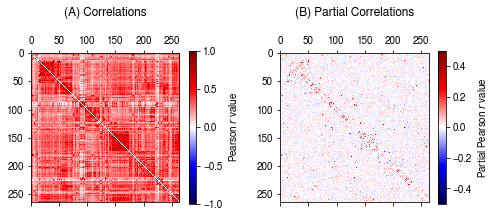

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3))
im = axs[0].matshow(mR, vmin=-1, vmax=1, cmap="seismic")
axs[0].set_title("(A) Correlations\n")
cbar = axs[0].figure.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel(r"Pearson $r$ value", rotation=90, va="top")

im = axs[1].matshow(mPR, vmin=-0.5, vmax=0.5, cmap="seismic")
axs[1].set_title("(B) Partial Correlations\n")
cbar = axs[1].figure.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel(r"Partial Pearson $r$ value", rotation=90, va="top")

#axs[2].set_visible(False)
plt.tight_layout()
plt.savefig("figures/connectomes.png", dpi=300)


### Creating a generic function

Here we assemble all of the steps above into a single function.

In [9]:
### Create a Handy Function

def connectome_visualization(variable, name=None, blackbg=True):
    if name is None:
        name = variable
    # Load the data
    data = pd.read_csv("%s.csv" % (variable,))
    
    # Extract Regions
    ROIs = []

    for c in data['connection']:
        roi1, roi2 = c.split("-")

        if int(roi1) not in ROIs:
            ROIs.append(int(roi1))
        if int(roi2) not in ROIs:
            ROIs.append(int(roi2))
    ROIs.sort()

    # Extra ROI data
    sub = power2011[power2011['ROI'].isin( ROIs)]
    N = len(sub['ROI'])
    
    connectome = np.zeros((N, N))
    weighted_connectome = np.zeros((N, N))
    
    for c in range(N):
        for r in range(N):
            roi1 = ROIs[c]
            roi2 = ROIs[r]
            conn_name = "%d-%d" % (min(roi1, roi2), max(roi1, roi2))
            entry = data.loc[data['connection'] == conn_name]
            if len(entry) == 1:
                beta=float(entry['Beta'])
                connectome[c,r] = beta
                weighted_connectome[c,r] = beta * mPR[int(ROIs[c]-1), int(ROIs[r]-1)]
    
    plt.imshow(connectome)
    plt.title("Connectome (Beta values)")
    plt.show()

    xyz = []
    sub.loc[:,['X', 'Y', 'Z']]
    for roi in ROIs:
        entry = sub.loc[sub['ROI'] == roi]
        x = int(entry['X'])
        y = int(entry['Y'])
        z = int(entry['Z'])
        xyz.append((x,y,z))
    coords = np.array(xyz)

    colors = []
    sub.loc[:,['Color']]
    for roi in ROIs:
        entry = sub.loc[sub['ROI'] == roi]
        #col = entry['Color']
        col = entry.iloc[0,5]
        colors.append(col.lower())

    # Replace the stupid "pale blue"
    
    colors = [x if x != "pale blue" else "dodgerblue" for x in colors ]
    nip.plot_connectome(connectome, coords, colorbar=True,
                    title=r"Predictors of %s" % (name,), 
                    black_bg=blackbg, node_color=colors)
    plt.savefig("%s.png" % (variable,))
    nip.show()

    nip.plot_connectome_strength(connectome, coords,
                                 title=r"Importance of ROIs in %s" % (name,))
    plt.savefig("%s_importance.png" % (variable,))
    nip.show()
    
    return connectome, coords, colors, weighted_connectome

## Rate of Forgetting $\alpha$

We use the new function to plot a different variable, the Rate of Forgetting $\alpha$.

Now some prettier visualizations

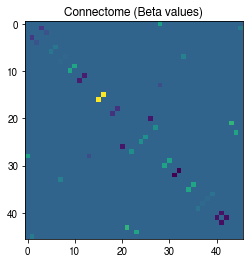

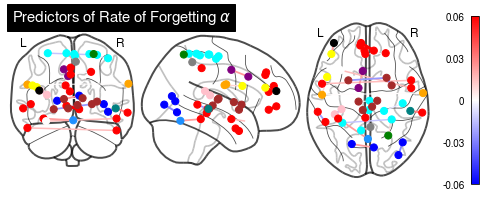

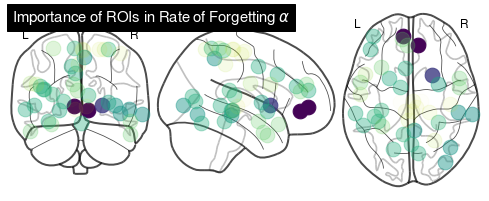

In [10]:
c, nc, cols, wc = connectome_visualization("alpha4", name=r"Rate of Forgetting $\alpha$", blackbg=False)
nip.view_connectome(c, nc, colorbar_fontsize=8)

## Prettier Visualizations
Some prettier visualizations. First, we need to get the network names and colors.

In [11]:
alpha = pd.read_csv("alpha4.csv")
alpha

index network                                      network_names  \
0    7681     1-1  Sensory/somatomotor Hand-Sensory/somatomotor Hand   
1    9268     1-1  Sensory/somatomotor Hand-Sensory/somatomotor Hand   
2   10335     1-1  Sensory/somatomotor Hand-Sensory/somatomotor Hand   
3   11925     2-2  Sensory/somatomotor Mouth-Sensory/somatomotor ...   
4   15363     3-3  Cingulo-opercular Task Control-Cingulo-opercul...   
5   19072     4-4                                  Auditory-Auditory   
6   28883     5-5                          Default mode-Default mode   
7   29405     5-5                          Default mode-Default mode   
8   30209     5-5                          Default mode-Default mode   
9   33920     5-5                          Default mode-Default mode   
10  34438     5-5                          Default mode-Default mode   
11  34707    -1-5                             Uncertain-Default mode   
12  35653     1-6         Sensory/somatomotor Hand-Memory retrieval?   
13  35734     5-6                     Default mode-Memory retrieval?   
14  40009     7-7                                      Visual-Visual   
15  45569     7-7                                      Visual-Visual   
16  46245     2-8  Sensory/somatomotor Mouth-Fronto-parietal Task...   
17  58004     8-9              Fronto-parietal Task Control-Salience   
18  59360   10-10                            Subcortical-Subcortical   
19  59622   10-10                            Subcortical-Subcortical   
20  60683   10-10                            Subcortical-Subcortical   
21  60950   10-10                            Subcortical-Subcortical   
22  62951    5-11                     Default mode-Ventral attention   
23  64806    5-13                            Default mode-Cerebellar   
24  67873    1-12          Sensory/somatomotor Hand-Dorsal attention   

   connection  censor      Beta  
0       25-30    True -0.013796  
1       28-36    True -0.005850  
2       39-40    True  0.006386  
3       45-46    True  0.000550  
4       51-59    True  0.023500  
5       64-73    True -0.021663  
6     107-110    True  0.060395  
7     101-112    True -0.000564  
8     113-115    True -0.015528  
9     128-129    True  0.015907  
10    118-131    True -0.023351  
11    123-132    True  0.015685  
12     13-136    True  0.021903  
13     94-136    True -0.007220  
14    145-152    True  0.022993  
15    161-173    True -0.028745  
16     45-176    True  0.010165  
17    188-220    True  0.024042  
18    224-225    True  0.001759  
19    222-226    True  0.005059  
20    227-230    True -0.024423  
21    230-231    True -0.025399  
22    119-239    True  0.029407  
23    126-246    True  0.023187  
24     25-258    True  0.007565

Then, we define the list of network names and corresponding colors

In [ ]:
ROIs = []

FCvals = []
for conn in alpha['connection']:
    roi1, roi2 = conn.split("-")

    if int(roi1) not in ROIs:
        ROIs.append(int(roi1))
    if int(roi2) not in ROIs:
        ROIs.append(int(roi2))
        
    FCvals.append(mPR[int(roi1)-1, int(roi2)-1])
ROIs.sort()

pcol = [colortranslate(x) for x in pcol]

subset = pd.DataFrame(power2011[power2011['ROI'].isin(ROIs)])
print(subset.shape)
subset

Now, we use the `subset` to create the list of network names and corresponding colors

In [ ]:
allkols=list(subset['Color'])
allnets=list(subset['NetworkName'])

kols=[]
nets=[]
for i in range(len(allkols)):
    if not allkols[i] in kols:
        kols.append(allkols[i])
        nets.append(allnets[i])

handles = [Line2D([0], [0], marker='o', markerfacecolor=x, color="w", markersize=10) for x in [colortranslate(x) for x in kols]]

And now, we visualize that:

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(10, 4.2))

nip.plot_connectome(c, nc, [colortranslate(x) for x in cols], 
                    edge_cmap="seismic", 
                    #edge_cmap="viridis", 
                    axes=axs, node_size=12,
                    display_mode="lzry", colorbar=True, 
                    edge_vmax=0.06, edge_vmin=-0.06)

fig.legend(handles, nets, loc="lower center", ncol=3)
plt.savefig("figures/alpha4_pretty.png", figsize=(10, 4.2), dpi=300)
plt.show()

## Node Importance

In [ ]:
importance = np.sum(np.abs(c), axis=1)
fig, axs = plt.subplots(1,1, figsize=(10, 2.5))
nip.plot_markers(node_values=importance, node_coords=nc, alpha=0.6, 
                 axes=axs, display_mode="lzry", node_cmap="plasma", node_vmin=-0, node_vmax=0.075)
plt.savefig("figures/alpha4_importance.png", dpi=300)
plt.show()

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(10, 2.8))

nip.plot_connectome(c, nc, [colortranslate(x) for x in cols], 
                    edge_cmap="RdYlBu_r", axes=axs,
                    display_mode="lyrz", colorbar=True, 
                    edge_vmax=0.06, edge_vmin=-0.05)

fig.legend(handles, nets, loc="lower center", ncol=3)
fig.suptitle("fMRI Correlates")
plt.savefig("figures/alpha4_garvey.png", dpi=300)
plt.show()

## Personalized Node Importance

This follows a suggestion by Florian Sense.

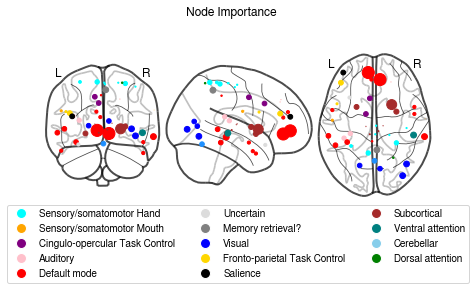

In [17]:
importance = np.sum(np.abs(c), axis=1)
size = np.power(importance, 2)
fig, axs = plt.subplots(2,1, figsize=(7, 4),
                       gridspec_kw={'height_ratios':(10,1)})

d = nip.plot_glass_brain(None, axes=axs[0], display_mode="ortho")
d.add_markers(nc, 
              marker_color=[colortranslate(x) for x in cols], 
              marker_size = 40000*size)
#d.add_contours("episodic_memory_association-test_z_FDR_0.01.nii.gz", levels=[0], filled=True, colors="#FF000033")
#d.add_contours("memory_retrieval_association-test_z_FDR_0.01.nii.gz", levels=[0], filled=True, colors="#0000FF33")
#d.add_contours("autobiographical_memory_association-test_z_FDR_0.01.nii.gz", levels=[0], filled=True, colors="#00FF0033")
axs[1].axis('off')
axs[1].legend(handles, nets, loc="center", ncol=3)
fig.suptitle("Node Importance")
plt.savefig("alpha4_florian.png", dpi=300)

## Comparison to Task-Based Meta-Analytic Activations

Here we compare the distributions of ROIs to existing meta-analytic data from neurosynth 

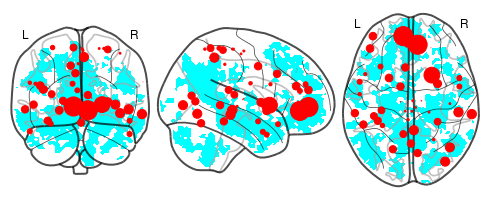

In [23]:
d  = nip.plot_glass_brain(None, display_mode="ortho")
#d.add_contours("memory_retrieval_association-test_z_FDR_0.01.nii.gz", levels=[1], filled=True, colors="aqua")
d.add_contours("autobiographical_memory_association-test_z_FDR_0.01.nii.gz", levels=[1], filled=True, colors="aqua")
d.add_markers(nc, 
              marker_color="red",
              marker_size = 100000* size)


In [43]:
print(nc)
subset

[[ -7 -52  61]
 [ 29 -39  59]
 [ 20 -29  60]
 [-29 -43  61]
 [ 42 -20  55]
 [  2 -28  60]
 [  3 -17  58]
 [-53 -10  24]
 [ 66  -8  25]
 [-10  -2  42]
 [ -5  18  34]
 [-38 -33  17]
 [-30 -27  12]
 [ -2 -37  44]
 [ 22  39  39]
 [ -7  51  -1]
 [  8  42  -5]
 [ -2  38  36]
 [ -3  42  16]
 [ -8  48  23]
 [-58 -30  -4]
 [ 65 -31  -9]
 [ 52  -2 -16]
 [-34 -38 -16]
 [ 52   7 -30]
 [-53   3 -27]
 [-49 -42   1]
 [-31  19 -19]
 [  4 -48  51]
 [  8 -72  11]
 [-18 -68   5]
 [ 42 -66  -8]
 [ 37 -81   1]
 [-47  11  23]
 [-42  38  21]
 [-39  51  17]
 [  6 -24   0]
 [-10 -18   7]
 [ 12 -17   8]
 [ -5 -28  -4]
 [-22   7  -5]
 [ 23  10   1]
 [ 29   1   4]
 [ 51 -29  -4]
 [  1 -62 -18]
 [ 25 -58  60]]


ROI   X   Y   Z  Network      Color                     NetworkName
12    13  -7 -52  61        1       Cyan        Sensory/somatomotor Hand
24    25  29 -39  59        1       Cyan        Sensory/somatomotor Hand
27    28  20 -29  60        1       Cyan        Sensory/somatomotor Hand
29    30 -29 -43  61        1       Cyan        Sensory/somatomotor Hand
35    36  42 -20  55        1       Cyan        Sensory/somatomotor Hand
38    39   2 -28  60        1       Cyan        Sensory/somatomotor Hand
39    40   3 -17  58        1       Cyan        Sensory/somatomotor Hand
44    45 -53 -10  24        2     Orange       Sensory/somatomotor Mouth
45    46  66  -8  25        2     Orange       Sensory/somatomotor Mouth
50    51 -10  -2  42        3     Purple  Cingulo-opercular Task Control
58    59  -5  18  34        3     Purple  Cingulo-opercular Task Control
63    64 -38 -33  17        4       Pink                        Auditory
72    73 -30 -27  12        4       Pink                        Auditory
93    94  -2 -37  44        5        Red                    Default mode
100  101  22  39  39        5        Red                    Default mode
106  107  -7  51  -1        5        Red                    Default mode
109  110   8  42  -5        5        Red                    Default mode
111  112  -2  38  36        5        Red                    Default mode
112  113  -3  42  16        5        Red                    Default mode
114  115  -8  48  23        5        Red                    Default mode
117  118 -58 -30  -4        5        Red                    Default mode
118  119  65 -31  -9        5        Red                    Default mode
122  123  52  -2 -16        5        Red                    Default mode
125  126 -34 -38 -16        5        Red                    Default mode
127  128  52   7 -30        5        Red                    Default mode
128  129 -53   3 -27        5        Red                    Default mode
130  131 -49 -42   1        5        Red                    Default mode
131  132 -31  19 -19       -1      White                       Uncertain
135  136   4 -48  51        6       Gray               Memory retrieval?
144  145   8 -72  11        7       Blue                          Visual
151  152 -18 -68   5        7       Blue                          Visual
160  161  42 -66  -8        7       Blue                          Visual
172  173  37 -81   1        7       Blue                          Visual
175  176 -47  11  23        8     Yellow    Fronto-parietal Task Control
187  188 -42  38  21        8     Yellow    Fronto-parietal Task Control
219  220 -39  51  17        9      Black                        Salience
221  222   6 -24   0       10      Brown                     Subcortical
223  224 -10 -18   7       10      Brown                     Subcortical
224  225  12 -17   8       10      Brown                     Subcortical
225  226  -5 -28  -4       10      Brown                     Subcortical
226  227 -22   7  -5       10      Brown                     Subcortical
229  230  23  10   1       10      Brown                     Subcortical
230  231  29   1   4       10      Brown                     Subcortical
238  239  51 -29  -4       11       Teal               Ventral attention
245  246   1 -62 -18       13  Pale blue                      Cerebellar
257  258  25 -58  60       12      Green                Dorsal attention

### Results vs. Meta-Analysis of Memory Retrieval

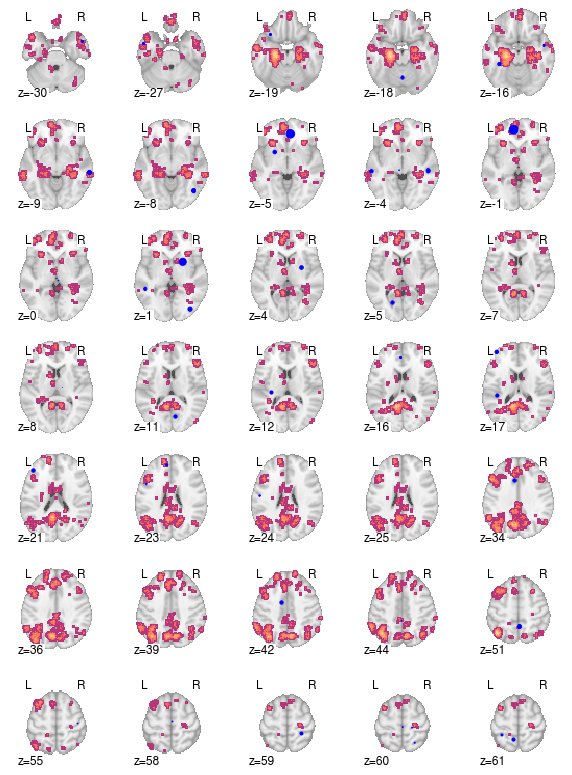

In [64]:
Z = sorted(set(subset["Z"]))
K = list(np.array(subset[["X", "Y", "Z"]]))
K = [list(k) for k in K]
S = ["%s" % k for k in K]
D = dict(zip(S, [20000*x for x in size] ))
fig, axs = plt.subplots(7, 5, figsize=(10, 14))
img = nimg.smooth_img(nimg.load_img("memory_retrieval_association-test_z_FDR_0.01.nii.gz"), 1.5),
i = 0
for r in range(7):
    for c in range(5):
        
        d  = nip.plot_stat_map(img[0], 
                               axes = axs[r,c], 
                               colorbar=False,
                               display_mode="z", 
                               cut_coords=[Z[i]], 
                               threshold=1e-6,
                               cmap = "magma")
        
        mask = nc[:, 2] == Z[i]
        coords = nc[mask, :]
        #print(coords)
        #print(coords)
        sizes = [D["%s" % list(coord)] for coord in coords]
        #print(sizes)
        d.add_markers(coords, 
                      marker_color="blue",
                      marker_size = sizes)
        i += 1
        
plt.savefig("alpha4_vs_metanalysis_retrieval.png", dpi=300)

X   Y   Z
12   -7 -52  61
24   29 -39  59
27   20 -29  60
29  -29 -43  61
35   42 -20  55
38    2 -28  60
39    3 -17  58
44  -53 -10  24
45   66  -8  25
50  -10  -2  42
58   -5  18  34
63  -38 -33  17
72  -30 -27  12
93   -2 -37  44
100  22  39  39
106  -7  51  -1
109   8  42  -5
111  -2  38  36
112  -3  42  16
114  -8  48  23
117 -58 -30  -4
118  65 -31  -9
122  52  -2 -16
125 -34 -38 -16
127  52   7 -30
128 -53   3 -27
130 -49 -42   1
131 -31  19 -19
135   4 -48  51
144   8 -72  11
151 -18 -68   5
160  42 -66  -8
172  37 -81   1
175 -47  11  23
187 -42  38  21
219 -39  51  17
221   6 -24   0
223 -10 -18   7
224  12 -17   8
225  -5 -28  -4
226 -22   7  -5
229  23  10   1
230  29   1   4
238  51 -29  -4
245   1 -62 -18
257  25 -58  60

### Results vs. Meta-Analsis of Episodic Memory

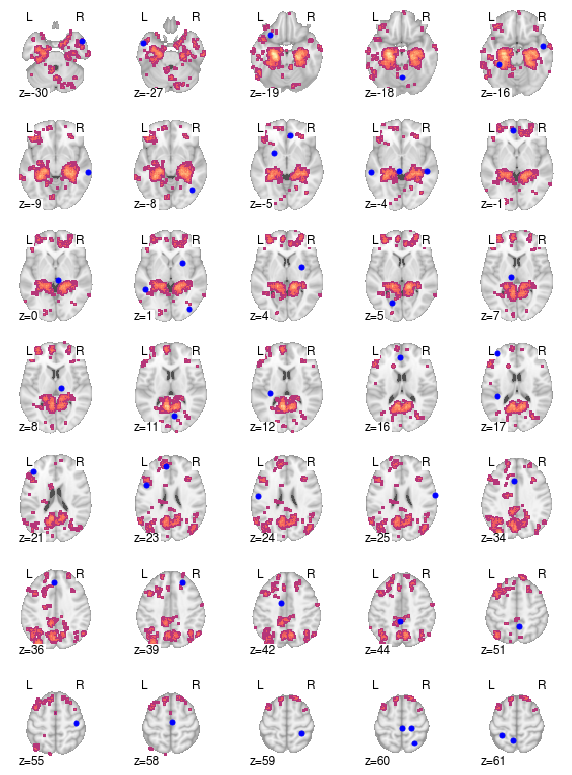

In [20]:
fig, axs = plt.subplots(7, 5, figsize=(10, 14))
img = nimg.smooth_img(nimg.load_img("episodic_memory_association-test_z_FDR_0.01.nii.gz"), 1.5),
i = 0
for r in range(7):
    for c in range(5):
        
        d  = nip.plot_stat_map(img[0], 
                               axes = axs[r,c], 
                               colorbar=False,
                               display_mode="z", 
                               cut_coords=[Z[i]], 
                               threshold=1e-6,
                               cmap = "magma")
        
        mask = nc[:, 2] == Z[i]
        coords = nc[mask, :]
        d.add_markers(coords, 
                      marker_color="blue",
                      marker_size = 25)
        i += 1
        
plt.savefig("alpha4_vs_metanalysis_episodic.png", dpi=300)

### Results vs. Meta-Analysis of Both Episodic Memory and Memory Retrieval

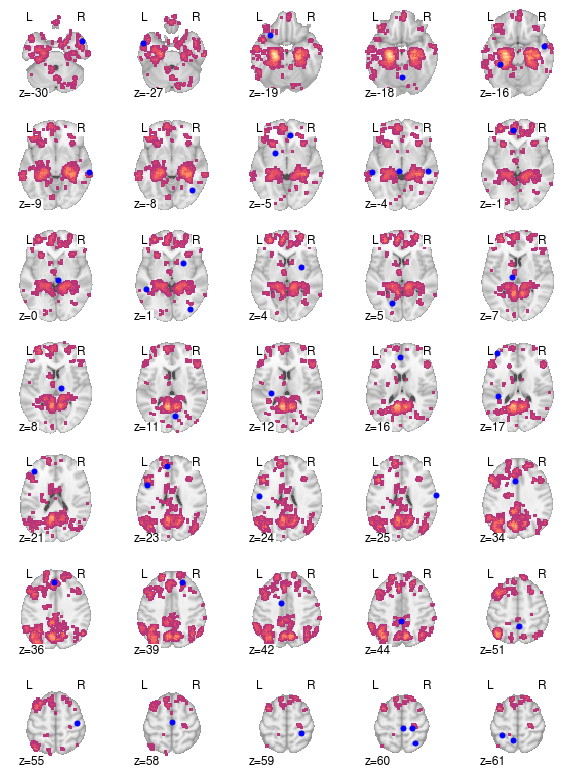

In [21]:
fig, axs = plt.subplots(7, 5, figsize=(10, 14))
episodic_img = nimg.smooth_img(nimg.load_img("episodic_memory_association-test_z_FDR_0.01.nii.gz"), 1.5)
retrieval_img = nimg.smooth_img(nimg.load_img("memory_retrieval_association-test_z_FDR_0.01.nii.gz"), 1.5)

result_img = nimg.math_img("img1 + img2",
                           img1=episodic_img, img2=retrieval_img)
i = 0
for r in range(7):
    for c in range(5):
        
        d  = nip.plot_stat_map(result_img, 
                               axes = axs[r,c], 
                               colorbar=False,
                               display_mode="z", 
                               cut_coords=[Z[i]], 
                               threshold=1e-6,
                               cmap = "magma")
        
        mask = nc[:, 2] == Z[i]
        coords = nc[mask, :]
        d.add_markers(coords, 
                      marker_color="blue",
                      marker_size = 25)
        i += 1
        
plt.savefig("alpha4_vs_metanalysis_episodic+retrieval.png", dpi=300)